<a href="https://colab.research.google.com/github/RATNAKER555/MLEND/blob/main/ECS7020P_miniproject_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1) Author**

**Student Name: Ratnaker Gautam**

**Student ID: 230916641**  

# **2) Problem formulation**

The objective is to create a machine learning pipeline leveraging the MLEnd Yummy Dataset. This pipeline will be designed to analyze input images depicting dishes containing either rice or chips and make predictions whether the dish in the photo contains rice or chips. The goal is to develop a robust model that can classify images based on the presence of either rice or chips within the dish depicted in the photo.

# **3) The Dataset**
The dataset being used here is the complete **MLEnd Yummy Dataset**, not the small one!
In the lab tutorial the small version of the dataset was being downloaded every single time the notebook was run, however the actual dataset is vast and it is not feasible to download every single time the notebook is run. To avoid this, I downloaded the dataset from Github, zipped and uploaded it to my drive, I also added the attributes .csv in the archive. So to run the notebook, you just need to have the archive in your drive and modify the path once. I also implemented something similar to what we did in the lab, i.e downloading the whole dataset every single time the notebook is run, but I won't recommend it.



# **4) Machine Learning Pipeline - Transformation**

*   We extract the archive contents containing the dataset    
  and the attributes file into the current working directory *Data*.
*   Then, the attributes .csv file is loaded in a dataframe   
  with the *filename* column being set as the index. There's not a significant reason behind this, but the fact that it eases our operations.

*   Visualisation is the following step, which gives a
  general idea of how the images and if there's any size disparity, actually a size disparity exists which may be fixed before training our model.

*   This analysis is limited to determining which dishes  
  contain either *Rice* or *Chips*, so we eliminate every single row in the dataset, which lacks either *Rice* or *Chips*. This leads to a much more extensive dataset containing 824 entries as compared to the Lab one, which has around 100 entries. However there exists a class imbalance, the class *Rice* occurs 773 times while *Chips* 51 times. Also any NA/Null values are eliminated in this step itself.

*   The next step involves reading the *Ingredients* column
   of the dataframe and checking whether there's a mention of either '*Rice*' or '*Chips*'. I'm actually checking for *chip* rather than *Chips* and I have explained that later before the code cell. If there's a mention of '*Rice*', in the new *Rice_Chips* column, we assign the class ID *1*, otherwise *0*. It is to note that it might occur that *Rice* and *Chips* might be present simultaneously in a dish, in that case the class is randomly assigned.

* The final step involves removing unncessary columns in the
   dataframe and dealing with the class imbalance. Only *Benchmark_A* and *Rice_Chips* columns are retained, and   the class imbalance is sorted out by randomly filtering 55%
  of class *1* entries.

* The final step in the pipeline is preprocessing the images,
  which involves converting the image into a numpy array first, followed by normalizing the pixel values, reshaping the images and finally assigning the labels to the images. We then split into train and test, using the *Benchmark_A* column, the splitting is derived from the Lab Tutorial.


# **5) Modelling**

I didn't plan on using a regressor, for both the basic and advanced immplementations, I used neural networks. The neural network I used was made using Keras, it contains of three layers:

*   A flattening layer that reshapes the input images into a one-dimensional array.
*   A fully connected layer with 128 units and a ReLU activation function.
*  An output layer with 1 unit and a sigmoid activation function.

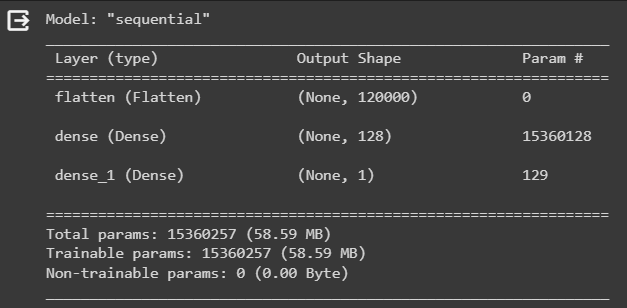







# 6) Methodology

* **Model Compilation:** The model is compiled using the *Adam* optimizer and *Binary Crossentropy* as the loss function. The *accuracy* metric is chosen to evaluate the model's performance during training.

* **Class Weight Calculation:** Class weights are computed to handle the class imbalance in the training data using *compute_class_weight*. This is essential when dealing with unevenly distributed classes to give higher weight to the less frequent class during training.

* **Model Training:** The model is trained using model.fit. It specifies the training data (*X_train* and *y_train*), the number of epochs, batch size, validation split, and the computed class weights (*class_weight_dict*) to address class imbalance.

* **Model Evaluation:** The trained model is used to predict labels for the test set (*X_test*). A threshold of *0.6* is applied to the predictions for converting probability scores to binary labels (*0* or *1*) in predicted_labels.

* **Accuracy Calculation:** The accuracy of the model is computed by comparing the predicted labels (*predicted_labels*) against the true labels (*y_test*) using *accuracy_score*.

* **Confusion Matrix Generation:** A confusion matrix (*conf_matrix*) is generated using *confusion_matrix* to visualize the model's performance in making specific types of errors (*true positives, false positives, true negatives, false negatives*).

* **Per-Class Accuracy Calculation:** The per-class accuracy is computed by dividing the diagonal elements of the confusion matrix (*true positives*) by the total instances per class.

* **Display Per-Class Accuracy:** The per-class accuracy for each class is printed to show how well the model performs for individual classes.

* **Classification Report:** A detailed classification report is generated using *classification_report*, displaying metrics such as *precision, recall, F1-score, and support* for each class (*Chips* and *Rice*).



# 7) Results

**MLEnd is a handy library for performing operations on the Yummy dataset, meanwhile tqdm displays the progress bar**

In [ ]:
!pip install mlend
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.5 MB/s eta 0:00:00


**Also, I'll be working on the bigger dataset itself not the small one. This cell has been borrowed from the Lab Tutorial**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy, yummy_load
from mlend import download_yummy_small, yummy_small_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

**Finding the current path**

In [ ]:
pwd

'/content'

**Creating directory to store the dataset**

In [ ]:
os.mkdir("Data")

**We can either download the dataset and use it in the local runtime or use a zipped version of the larger dataset which I have in my drive. There's a tremendous benefit of using the zipped file, as we save a lot of time we'd usually waste everytime downloading the large dataset everytime and it also reduces the clutter in my personal drive**

**Downloading and using in the runtime storage**

**Uncomment the next two cells to use this**

In [ ]:
#baseDir = download_yummy(save_to = '/content/Data')
#baseDir

In [ ]:
#os.listdir(baseDir)

**Unzipping the zipped file in the Data directory**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Creating a working directory 'Data' and extracting the zipped file contents into this**

In [ ]:
import zipfile
import os
from tqdm import tqdm

zip_file_path = '/content/drive/MyDrive/Data/yummy.zip'
extracted_folder_path = '/content/Data'

os.makedirs(extracted_folder_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    file_count = len(zip_ref.infolist())

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    for file in tqdm(zip_ref.infolist(), desc='Extracting', total=file_count):
        zip_ref.extract(file, extracted_folder_path)

print("Extraction complete.")


Extracting: 100%|██████████| 3251/3251 [00:49<00:00, 65.46it/s] 

Extraction complete.


In [ ]:
MLENDYD_df = pd.read_csv('/content/Data/yummy/MLEndYD_image_attributes_benchmark.csv').set_index('filename')
MLENDYD_df

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,like,4.0,Train
000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,strongly_like,5.0,Train
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train
...,...,...,...,...,...,...,...,...,...,...,...
003246.jpg,vegetarian,indian,indian,zeera_rice,home,"1_cup_basmati_rice,2_cups_water,2_tablespoons_...",healthy,4.0,strongly_like,5.0,Train
003247.jpg,vegetarian,indian,indian,paneer_and_dal,home,"fried_cottage_cheese,ghee,lentils,milk,wheat_f...",healthy,4.0,strongly_like,5.0,Test
003248.jpg,vegetarian,indian,indian,samosa,home,"potato,onion,peanut,salt,turmeric_powder,red_c...",very_unhealthy,1.0,like,4.0,Test


**Taking a look at the pictures**

(-0.5, 4031.5, 3023.5, -0.5)

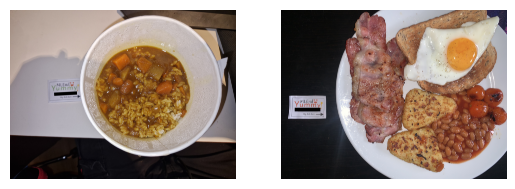

In [ ]:
I = plt.imread('/content/Data/yummy/MLEndYD_images/000001.jpg')
plt.subplot(1,2,1)
plt.imshow(I)
plt.axis('off')

I = plt.imread('/content/Data/yummy/MLEndYD_images/000002.jpg')
plt.subplot(1,2,2)
plt.imshow(I)
plt.axis('off')

**Filtering the dataset to exclude all dishes which don't contain either Rice or Chips as their ingredients**

**it is imperative to note here that, we check for the term 'Chip' rather than 'Chips', as it may have happened that some person would have written 'Chips' as 'Chip', but both terms convey the same meaning. If we use 'Chips', some dishes might get skipped, and this is actually the case. In the .csv file there are 114 entries for 'Chip', while only 95 for 'Chips'**

In [ ]:
filtered_df = MLENDYD_df[MLENDYD_df['Ingredients'].str.contains('Rice|Chip', case=False, na=False)]

filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 000001.jpg to 003246.jpg
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Diet                    823 non-null    object 
 1   Cuisine_org             824 non-null    object 
 2   Cuisine                 824 non-null    object 
 3   Dish_name               824 non-null    object 
 4   Home_or_restaurant      824 non-null    object 
 5   Ingredients             824 non-null    object 
 6   Healthiness_rating      824 non-null    object 
 7   Healthiness_rating_int  824 non-null    float64
 8   Likeness                823 non-null    object 
 9   Likeness_int            823 non-null    float64
 10  Benchmark_A             824 non-null    object 
dtypes: float64(2), object(9)
memory usage: 77.2+ KB


**Our dataset is much more extensive than the small one, we have 824 entries which will help us obtain better predictions**

In [ ]:
filtered_df.head(824)

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
000016.jpg,vegan,indian,indian,khichdi,home,"rice,spices,herbs",healthy,4.0,neutral,3.0,Test
000020.jpg,vegetarian,indian,indian,lentil-based_vegetable_stew_with__rice,home,ingredients:\nfor_cooking_rice:\n1_cup_rice_(a...,healthy,4.0,like,4.0,Test
000021.jpg,non_vegetarian,asian,asian,biryani,home,"mutton,rice,onion,tomato,red_chilli_powder,sal...",healthy,4.0,strongly_like,5.0,Train
000022.jpg,vegetarian,indian,indian,rice_beetroot_curry,home,"rice,beetroot,salt,spices",very_healthy,5.0,neutral,3.0,Train
...,...,...,...,...,...,...,...,...,...,...,...
003234.jpg,vegetarian,indian,indian,rasam_rice,home,"garlic,curry_leaves,green_chilli,cumin,black_p...",very_healthy,5.0,strongly_like,5.0,Test
003235.jpg,non_vegetarian,singapore,singaporean,singapore_style_noodles,asda,"cooked_rice_noodles,roasted_chicken,water,red_...",very_healthy,5.0,like,4.0,Test
003243.jpg,vegetarian,british,british,pan-fried_beef_with_rice,restaurant,"rice,corn,beef,red_cabbage",healthy,4.0,dislike,2.0,Train


**This is a very important step now. Here:**


1.   Add the Rice_Chips Column
2.   It might be that a certain dish contains both Rice and Chips simultaneously, so we will randomly assign the class in that scenario.



**Importing random in case of random assignment**

In [ ]:
import random

**Defining a function to find out which class is present in the Ingredients**

In [ ]:
def determine_rice_chips(row):
    ingredients_lower = row['Ingredients'].lower()
    if 'rice' in ingredients_lower and 'chip' not in ingredients_lower:
        return 'Rice'
    elif 'chip' in ingredients_lower and 'rice' not in ingredients_lower:
        return 'Chips'
    elif 'rice' in ingredients_lower and 'chip' in ingredients_lower:
        return random.choice(['Rice', 'Chips'])
    else:
        return None

In [ ]:
df=filtered_df

**Apply the function to create the 'Rice_Chips' column**

In [ ]:
df['Rice_Chips'] = df.apply(determine_rice_chips, axis=1)

<ipython-input-16-a6a83311f7ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df.head()

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A,Rice_Chips
filename,,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train,Rice
000016.jpg,vegan,indian,indian,khichdi,home,"rice,spices,herbs",healthy,4.0,neutral,3.0,Test,Rice
000020.jpg,vegetarian,indian,indian,lentil-based_vegetable_stew_with__rice,home,ingredients:\nfor_cooking_rice:\n1_cup_rice_(a...,healthy,4.0,like,4.0,Test,Rice
000021.jpg,non_vegetarian,asian,asian,biryani,home,"mutton,rice,onion,tomato,red_chilli_powder,sal...",healthy,4.0,strongly_like,5.0,Train,Rice
000022.jpg,vegetarian,indian,indian,rice_beetroot_curry,home,"rice,beetroot,salt,spices",very_healthy,5.0,neutral,3.0,Train,Rice


In [ ]:
df['Rice_Chips'].value_counts()

Rice     773
Chips     51
Name: Rice_Chips, dtype: int64

**Creating Test Train Datasets**

**Declaring the base directory**

In [ ]:
baseDir='/content/Data/yummy'

**Converting our dataframe to a csv file and replacing it with the previous csv file for the whole dataset**

In [ ]:
file_path = '/content/Data/yummy/MLEndYD_image_attributes_benchmark.csv'
os.remove('/content/Data/yummy/MLEndYD_image_attributes_benchmark.csv')
df.to_csv(file_path, index=True)

In [ ]:
df.head(824)

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A,Rice_Chips
filename,,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train,Rice
000016.jpg,vegan,indian,indian,khichdi,home,"rice,spices,herbs",healthy,4.0,neutral,3.0,Test,Rice
000020.jpg,vegetarian,indian,indian,lentil-based_vegetable_stew_with__rice,home,ingredients:\nfor_cooking_rice:\n1_cup_rice_(a...,healthy,4.0,like,4.0,Test,Rice
000021.jpg,non_vegetarian,asian,asian,biryani,home,"mutton,rice,onion,tomato,red_chilli_powder,sal...",healthy,4.0,strongly_like,5.0,Train,Rice
000022.jpg,vegetarian,indian,indian,rice_beetroot_curry,home,"rice,beetroot,salt,spices",very_healthy,5.0,neutral,3.0,Train,Rice
...,...,...,...,...,...,...,...,...,...,...,...,...
003234.jpg,vegetarian,indian,indian,rasam_rice,home,"garlic,curry_leaves,green_chilli,cumin,black_p...",very_healthy,5.0,strongly_like,5.0,Test,Rice
003235.jpg,non_vegetarian,singapore,singaporean,singapore_style_noodles,asda,"cooked_rice_noodles,roasted_chicken,water,red_...",very_healthy,5.0,like,4.0,Test,Rice
003243.jpg,vegetarian,british,british,pan-fried_beef_with_rice,restaurant,"rice,corn,beef,red_cabbage",healthy,4.0,dislike,2.0,Train,Rice


In [ ]:
df_deleter=df
df_deleter.head(824)

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A,Rice_Chips
filename,,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train,Rice
000016.jpg,vegan,indian,indian,khichdi,home,"rice,spices,herbs",healthy,4.0,neutral,3.0,Test,Rice
000020.jpg,vegetarian,indian,indian,lentil-based_vegetable_stew_with__rice,home,ingredients:\nfor_cooking_rice:\n1_cup_rice_(a...,healthy,4.0,like,4.0,Test,Rice
000021.jpg,non_vegetarian,asian,asian,biryani,home,"mutton,rice,onion,tomato,red_chilli_powder,sal...",healthy,4.0,strongly_like,5.0,Train,Rice
000022.jpg,vegetarian,indian,indian,rice_beetroot_curry,home,"rice,beetroot,salt,spices",very_healthy,5.0,neutral,3.0,Train,Rice
...,...,...,...,...,...,...,...,...,...,...,...,...
003234.jpg,vegetarian,indian,indian,rasam_rice,home,"garlic,curry_leaves,green_chilli,cumin,black_p...",very_healthy,5.0,strongly_like,5.0,Test,Rice
003235.jpg,non_vegetarian,singapore,singaporean,singapore_style_noodles,asda,"cooked_rice_noodles,roasted_chicken,water,red_...",very_healthy,5.0,like,4.0,Test,Rice
003243.jpg,vegetarian,british,british,pan-fried_beef_with_rice,restaurant,"rice,corn,beef,red_cabbage",healthy,4.0,dislike,2.0,Train,Rice


In [ ]:
image_data=df_deleter.drop(columns=['Diet','Cuisine_org','Cuisine','Dish_name','Home_or_restaurant','Ingredients','Healthiness_rating','Healthiness_rating_int','Likeness','Likeness_int'],axis=1)

In [ ]:
image_data.head()

,Benchmark_A,Rice_Chips
filename,,
000001.jpg,Train,Rice
000016.jpg,Test,Rice
000020.jpg,Test,Rice
000021.jpg,Train,Rice
000022.jpg,Train,Rice


**Assigning class ID's**

In [ ]:
mapping = {'Chips': 0, 'Rice': 1}

image_data['Rice_Chips'] = image_data['Rice_Chips'].replace(mapping)
image_data.head(824)

,Benchmark_A,Rice_Chips
filename,,
000001.jpg,Train,1
000016.jpg,Test,1
000020.jpg,Test,1
000021.jpg,Train,1
000022.jpg,Train,1
...,...,...
003234.jpg,Test,1
003235.jpg,Test,1
003243.jpg,Train,1


**Removing 55% of the rows with class ID 1**

In [ ]:
np.random.seed(42)

class_1_indices = image_data[image_data['Rice_Chips'] == 1].index

remove_amount = int(len(class_1_indices) * 0.55)
remove_indices = np.random.choice(class_1_indices, size=remove_amount, replace=False)

image_data_new = image_data.drop(remove_indices)

image_data_new.reset_index(drop=False, inplace=True)

print(image_data_new)

image_data_new.head()

       filename Benchmark_A  Rice_Chips
0    000016.jpg        Test           1
1    000021.jpg       Train           1
2    000022.jpg       Train           1
3    000024.jpg       Train           0
4    000026.jpg       Train           1
..          ...         ...         ...
394  003216.jpg       Train           1
395  003223.jpg       Train           1
396  003225.jpg       Train           1
397  003229.jpg       Train           1
398  003243.jpg       Train           1

[399 rows x 3 columns]


,filename,Benchmark_A,Rice_Chips
0,000016.jpg,Test,1
1,000021.jpg,Train,1
2,000022.jpg,Train,1
3,000024.jpg,Train,0
4,000026.jpg,Train,1


In [ ]:
image_data_new['Rice_Chips'].value_counts()

1    348
0     51
Name: Rice_Chips, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

**Directory containing the images**

In [ ]:
directory_path = '/content/Data/yummy/MLEndYD_images/'

**Feature Extraction and Preprocessing**

In [ ]:
def process_images(row):
    try:
        full_path = directory_path + row['filename']
        img = load_img(full_path, target_size=(200, 200))
        img_array = img_to_array(img)
        img_array = img_array / 255.0
        label = row['Rice_Chips']
        return img_array, label
    except Exception as e:
        print(f"Error processing image")
        return None, None

In [ ]:
processed_data = image_data_new.apply(process_images, axis=1)

**Separate images and labels into lists**

In [ ]:
images = [pair[0] for pair in processed_data if pair[0] is not None]
labels = [pair[1] for pair in processed_data if pair[1] is not None]

**Convert images to numpy arrays**

In [ ]:
images_array = np.array(images)
labels_array = np.array(labels)

**Extract train and test indices based on 'Benchmark' column**

In [ ]:
train_indices = image_data_new[image_data_new['Benchmark_A'] == 'Train'].index
test_indices = image_data_new[image_data_new['Benchmark_A'] == 'Test'].index

**Split data into train and test sets using indices**

In [ ]:
X_train, y_train = images_array[train_indices], labels_array[train_indices]
X_test, y_test = images_array[test_indices], labels_array[test_indices]

In [ ]:
model = Sequential([
    Flatten(input_shape=(200, 200, 3)),  # Input shape for resized images (200x200) with 3 channels (RGB)
    Dense(128, activation='relu'),  # Add a fully connected layer
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 120000)            0         
                                                                 
 dense (Dense)               (None, 128)               15360128  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 15360257 (58.59 MB)
Trainable params: 15360257 (58.59 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Compile the model**

In [ ]:
model.compile(optimizer='adam', loss=BinaryCrossentropy(from_logits=False), metrics=['accuracy'])

In [ ]:
np.random.seed(42)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train)

class_weight_dict = dict(enumerate(class_weights))


model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, class_weight=class_weight_dict)

Epoch 1/10
8/8 [==============================] - 6s 46ms/step - loss: 32.4048 - accuracy: 0.5926 - val_loss: 42.5824 - val_accuracy: 0.0741
Epoch 2/10
8/8 [==============================] - 0s 19ms/step - loss: 11.8540 - accuracy: 0.5350 - val_loss: 13.5038 - val_accuracy: 0.0741
Epoch 3/10
8/8 [==============================] - 0s 20ms/step - loss: 4.1689 - accuracy: 0.5720 - val_loss: 6.0891 - val_accuracy: 0.2593
Epoch 4/10
8/8 [==============================] - 0s 21ms/step - loss: 2.8120 - accuracy: 0.5309 - val_loss: 1.1865 - val_accuracy: 0.8889
Epoch 5/10
8/8 [==============================] - 0s 18ms/step - loss: 3.8709 - accuracy: 0.6831 - val_loss: 1.4649 - val_accuracy: 0.8889
Epoch 6/10
8/8 [==============================] - 0s 19ms/step - loss: 2.6977 - accuracy: 0.6872 - val_loss: 1.3648 - val_accuracy: 0.8889
Epoch 7/10
8/8 [==============================] - 0s 18ms/step - loss: 1.1478 - accuracy: 0.8107 - val_loss: 3.7684 - val_accuracy: 0.4444
Epoch 8/10
8/8 [=======

**Evaluation with thresholding**

In [ ]:
predictions = model.predict(X_test)
predicted_labels = [1 if pred > 0.6 else 0 for pred in predictions]

5/5 [==============================] - 0s 8ms/step


**Evaluation**

In [ ]:
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6046511627906976


**Confusion Matrix**

In [ ]:
conf_matrix = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[11  8]
 [43 67]]


In [ ]:
# Per-class accuracy
total_per_class = np.sum(conf_matrix, axis=1)
accuracies_per_class = np.diag(conf_matrix) / total_per_class.astype(float)

for i, acc in enumerate(accuracies_per_class):
    print(f"Accuracy for class {i}: {acc}")

# Classification report
class_names = ['Chips', 'Rice']
report = classification_report(y_test, predicted_labels, target_names=class_names)
print("Classification Report:")
print(report)

Accuracy for class 0: 0.5789473684210527
Accuracy for class 1: 0.6090909090909091
Classification Report:
              precision    recall  f1-score   support

       Chips       0.20      0.58      0.30        19
        Rice       0.89      0.61      0.72       110

    accuracy                           0.60       129
   macro avg       0.55      0.59      0.51       129
weighted avg       0.79      0.60      0.66       129



**Saving the best weights**

In [ ]:
'''
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Data/best_yummy_rice_chips.h5')
'''

# 8) Conclusions
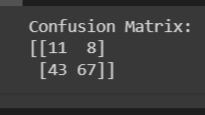

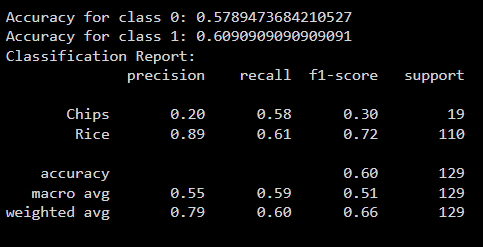

For the confusion Matrix:
* Class 0 (Chips):

True Negatives (11) represent correctly identified instances of chips.
False Positives (8) indicate instances wrongly classified as chips when they were rice.
* Class 1 (Rice):

True Positives (67) show correctly identified instances of rice.
False Negatives (43) represent instances wrongly classified as not rice when they actually were rice.

For the Classification Report:
* Class 0 (Chips) has an accuracy of approximately 57.89%, indicating that the model correctly identifies chip-containing dishes around 57.89% of the time.

* Class 1 (Rice) has an accuracy of approximately 60.91%, suggesting that the model correctly identifies rice-containing dishes around 60.91% of the time.

* Precision for Chips is low at 20%. This means that among the instances the model predicted as Chips, only 20% were actually Chips.
Recall for Chips is at 58%, signifying that the model correctly identified 58% of the actual Chips present in the dataset.

* F1-score for Chips is 0.30, which is the harmonic mean of precision and recall, balancing the two metrics.

* For Rice, the precision is high at 89%, indicating that among instances classified as Rice, 89% were correctly classified.

* The recall for Rice is 61%, showing that the model captured 61% of the actual Rice instances in the dataset.

* The F1-score for Rice is 0.72, indicating a better overall performance compared to Chips.

* The overall accuracy of the model is approximately 60%, meaning that among all instances in the test set, the model predicts the correct class about 60% of the time.

* The weighted average F1-score, which considers the imbalance in class distribution, is 0.66. This indicates the overall performance of the model across both classes, weighted by the number of samples.

This analysis suggests that while the model performs relatively better in identifying dishes containing rice, it struggles more when classifying dishes containing chips, possibly due to a smaller number of samples or more complexity in distinguishing chip-containing dishes based on the available features in the dataset.